In [1]:
import pandas as pd
import random
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df1 = pd.read_csv('train3.csv')
df2 = pd.read_csv('destinations1.csv')

In [3]:
df1.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [4]:
len(df1.columns)

24

In [5]:
df1.dropna(axis=0,how='any',inplace=True)
df2.dropna(axis=0,how='any',inplace=True)

In [6]:
df2.isnull().values.any()

False

In [7]:
df1.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

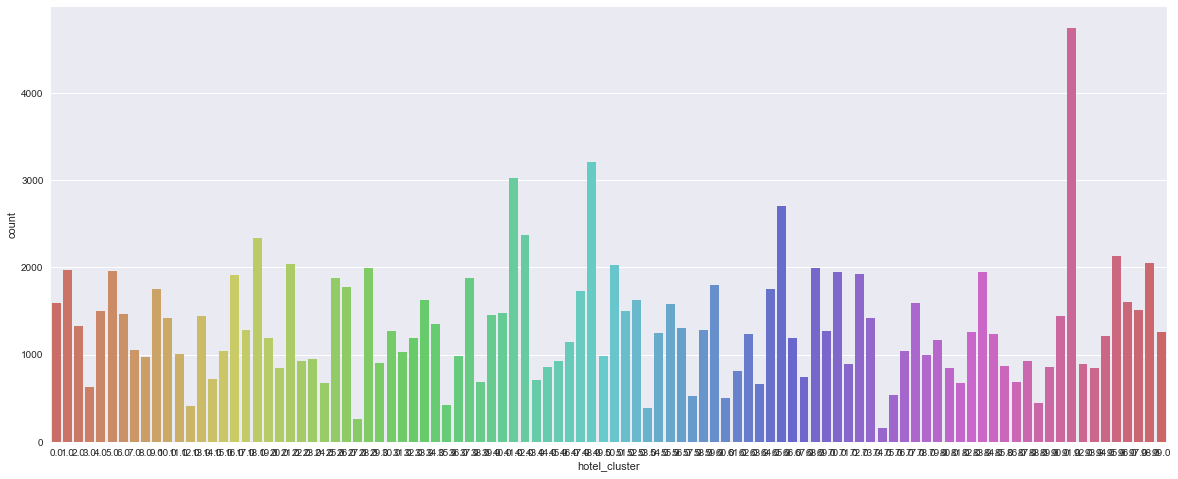

In [8]:
f, ax = plt.subplots(figsize=(20,8))
sns.countplot(x='hotel_cluster' , data = df1,palette = 'hls')
plt.show()

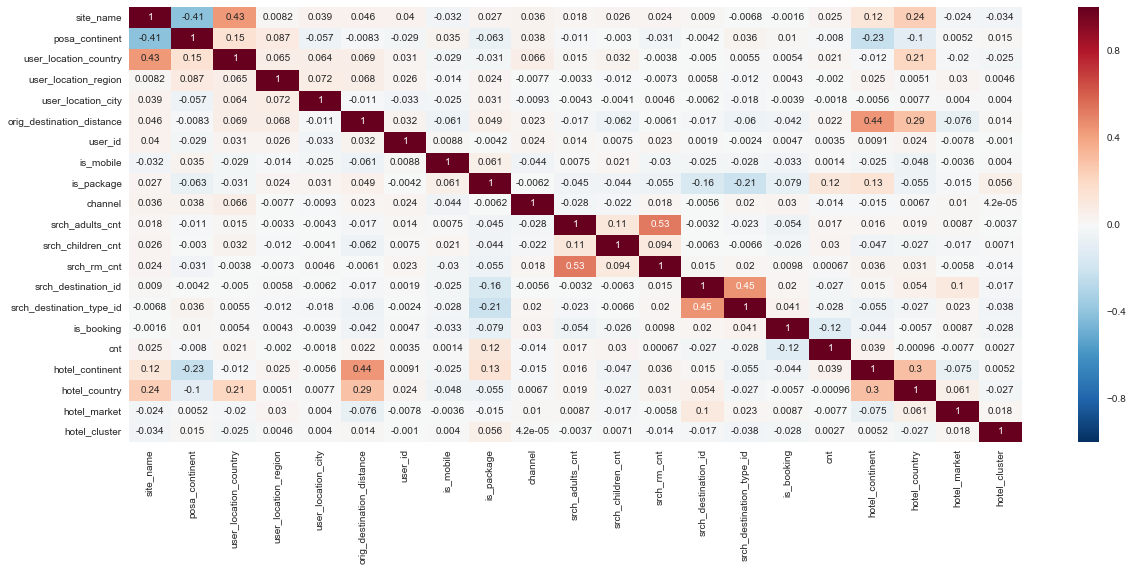

In [9]:
f, ax = plt.subplots(figsize=(20,8)) 
sns.heatmap(df1.corr(),annot = True)
plt.show()

In [10]:
print(df1['hotel_cluster'].value_counts())

91.0    4747
48.0    3210
41.0    3020
65.0    2697
42.0    2370
18.0    2335
95.0    2134
98.0    2047
21.0    2041
50.0    2021
28.0    1994
68.0    1990
1.0     1973
5.0     1961
83.0    1945
70.0    1944
72.0    1920
16.0    1911
25.0    1881
37.0    1881
59.0    1796
26.0    1773
64.0    1754
9.0     1746
47.0    1731
33.0    1629
52.0    1623
96.0    1597
77.0    1594
0.0     1590
        ... 
22.0     929
87.0     923
29.0     899
92.0     893
71.0     886
85.0     869
44.0     862
89.0     854
93.0     846
20.0     845
80.0     844
61.0     812
67.0     742
14.0     721
43.0     706
38.0     686
86.0     683
81.0     675
24.0     669
63.0     666
3.0      623
75.0     533
57.0     528
60.0     499
88.0     447
35.0     425
12.0     410
53.0     391
27.0     256
74.0     155
Name: hotel_cluster, dtype: int64


In [11]:
df1["srch_ci"] = pd.to_datetime(df1["srch_ci"], errors = 'coerce')
df1["srch_ci_year"] = df1["srch_ci"].dt.year
df1["srch_ci_month"] = df1["srch_ci"].dt.month

In [12]:
df1["srch_co"] = pd.to_datetime(df1["srch_co"], errors = 'coerce')
df1["srch_co_year"] = df1["srch_co"].dt.year
df1["srch_co_month"] = df1["srch_co"].dt.month

In [13]:
df1["date_time"] = pd.to_datetime(df1["date_time"], errors = 'coerce')
df1["date_time_year"] = df1["date_time"].dt.year
df1["date_time_month"] = df1["date_time"].dt.month

In [14]:
# If check in or check out date was not provided the length of stay wont be calculated
def length_of_stay (row):
   if (row['srch_ci_year'] in [2013,2014,2015]) and (row['srch_co_year']  in [2013,2014,2015]) :
      return row["srch_co"] - row["srch_ci"]
   return 0

df1["length_of_stay1"]  = df1.apply(length_of_stay, axis=1)

In [15]:
df1['length_of_stay1'].dtype

dtype('<m8[ns]')

In [16]:
df1['orig_destination_distance'] = (df1['orig_destination_distance'] - df1['orig_destination_distance'].mean()) / (df1['orig_destination_distance'].max() - df1['orig_destination_distance'].min())

In [17]:
df1["length_of_stay1"] = (df1["length_of_stay1"] / np.timedelta64(1, 'D')).astype(int)

In [18]:
df3 = df1[['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt','srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country','length_of_stay1', 'hotel_market',
       'hotel_cluster', 'srch_ci_year', 'srch_ci_month', 'srch_co_year',
       'srch_co_month', 'date_time_year', 'date_time_month']].astype(int)
df3['origin_dist']=df1['orig_destination_distance']

In [19]:
df3.columns

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city', 'user_id', 'is_mobile',
       'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country',
       'length_of_stay1', 'hotel_market', 'hotel_cluster', 'srch_ci_year',
       'srch_ci_month', 'srch_co_year', 'srch_co_month', 'date_time_year',
       'date_time_month', 'origin_dist'],
      dtype='object')

In [20]:
df3.dtypes

site_name                     int32
posa_continent                int32
user_location_country         int32
user_location_region          int32
user_location_city            int32
user_id                       int32
is_mobile                     int32
is_package                    int32
channel                       int32
srch_adults_cnt               int32
srch_children_cnt             int32
srch_rm_cnt                   int32
srch_destination_id           int32
srch_destination_type_id      int32
is_booking                    int32
cnt                           int32
hotel_continent               int32
hotel_country                 int32
length_of_stay1               int32
hotel_market                  int32
hotel_cluster                 int32
srch_ci_year                  int32
srch_ci_month                 int32
srch_co_year                  int32
srch_co_month                 int32
date_time_year                int32
date_time_month               int32
origin_dist                 

In [21]:
df3

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,...,length_of_stay1,hotel_market,hotel_cluster,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month,date_time_year,date_time_month,origin_dist
0,2,3,66,348,48862,12,0,1,9,2,...,4,628,1,2014,8,2014,8,2014,8,0.023598
1,2,3,66,348,48862,12,0,1,9,2,...,4,628,1,2014,8,2014,9,2014,8,0.023598
2,2,3,66,348,48862,12,0,0,9,2,...,4,628,1,2014,8,2014,9,2014,8,0.023598
3,2,3,66,442,35390,93,0,0,3,2,...,5,1457,80,2014,11,2014,11,2014,8,-0.089884
4,2,3,66,442,35390,93,0,0,3,2,...,5,1457,21,2014,11,2014,11,2014,8,-0.089847
5,2,3,66,442,35390,93,0,0,3,2,...,5,1457,92,2014,11,2014,11,2014,8,-0.090028
12,2,3,66,318,22418,756,0,1,9,2,...,3,191,18,2014,4,2014,4,2014,1,-0.132193
14,2,3,66,318,22418,756,0,1,2,2,...,3,191,25,2014,4,2014,4,2014,1,-0.132091
15,2,3,66,318,22418,756,0,1,2,2,...,2,191,25,2014,4,2014,4,2014,1,-0.132091
16,2,3,66,318,22418,756,0,1,2,2,...,2,191,25,2014,4,2014,4,2014,1,-0.132091


In [22]:
df2.fillna(-1,inplace=True)
p = PCA(n_components=20)
df2_fit_model = p.fit_transform(df2[[(i + 1) for i in range(149)]])
df2_fit_model_df = pd.DataFrame(df2_fit_model)
df2_fit_model_df['srch_destination_id'] = df2['srch_destination_id']

In [23]:
df_merged = pd.merge(df3, df2_fit_model_df, how='left', left_on='srch_destination_id',right_on='srch_destination_id')

In [24]:
df_merged.isnull().values.any()

True

In [25]:
df_merged.fillna(-1,inplace=True)

In [26]:
df_merged.isnull().values.any()

False

In [27]:
df_merged.to_csv('file.csv',sep=',')

In [28]:
df_merged.columns.values

array(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_adults_cnt',
       'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id',
       'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent',
       'hotel_country', 'length_of_stay1', 'hotel_market', 'hotel_cluster',
       'srch_ci_year', 'srch_ci_month', 'srch_co_year', 'srch_co_month',
       'date_time_year', 'date_time_month', 'origin_dist', 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=object)

In [29]:
len(df_merged.columns)

48

In [30]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

ignore = {'hotel_cluster','estimates'}
clos  = [c for c in df_merged.columns if c not in ignore]
x = df_merged[clos]
y = df_merged.hotel_cluster

logreg = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
rfe = RFE(logreg, 4)
rfe = rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False False False False False False
 False False False False False False False  True False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False]
[23 41 32  7  1  1 31 24 12 18 20 38  4 16 44 13  2  9  8  1 27 11 17  6 22
  3  1  5 15 42 14 33 28 34 10 43 40 36 30 37 19 26 39 29 25 21 35]


In [31]:
df_merged.columns.values

array(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_adults_cnt',
       'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id',
       'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent',
       'hotel_country', 'length_of_stay1', 'hotel_market', 'hotel_cluster',
       'srch_ci_year', 'srch_ci_month', 'srch_co_year', 'srch_co_month',
       'date_time_year', 'date_time_month', 'origin_dist', 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=object)

In [32]:
df_merged1 = df_merged[['user_location_city', 'user_id','hotel_market','origin_dist']]

In [33]:
from sklearn.ensemble import RandomForestClassifier
x_train , x_test, y_train, y_test = train_test_split(df_merged1,y, test_size=.2 , random_state=0)
dt1= RandomForestClassifier(criterion = 'entropy', random_state = 0)
dt1 = dt1.fit(x_train, y_train)
y_pred = dt1.predict(x_test)
print(round((dt1.score(x_test,y_test)),3))

0.465


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
for j in [500,2000,8000,99999]:
    clf_stump=DecisionTreeClassifier(max_features=None,max_leaf_nodes=j)
    print(j)
    for i in np.arange(1,15):
        bstlfy=AdaBoostClassifier(base_estimator=clf_stump,n_estimators=i)
        bstlfy=bstlfy.fit(x_train,y_train)

In [ ]:
print(round((bstlfy.score(x_test,y_test)),3))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))